<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/OrdenTopologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ordén Topológico**

Para entender que es el órden topológico, se debe saber el concepto de **grafo**,

Un *Grafo* es un tipo de dato abstracto, que contiene un conjunto de nodos, los cuales representan a los vértices y también esta compuesto por arcos(aristas)
Este algoritmo busca encontrar una secuencia.

Ahora sabiendo esto, podemos entender que el algoritmo de orden topológico, busca encontrar la acomodación de los vértices de un grafo acíclico dirigido.
El Ordenamiento topológico se define G que es un grafo con sus vertice y arcos.

Por lo que, buscamos **una secuencia** para poder resolver nuestros problemas que cumpla con las siguiente restricción que, a cada vértice $v$ de un grafo $G$ se le asigne $f(v)$, al que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.







##**Pasos del Algoritmo**


Tenemos que tener bien en cuenta que el orden topologico trabaja con grafos **dirigidos acíclicos**, este funciona en base a búsquedas a profundidad de los nodos 
no explorados , **DFS**, por cada búsqueda que realiza hace un recorrido post.órden, el cual consiste en recorrer primero las hojas y luego los ancestros) y luego, cada vez que visita un nodo, este queda con una **etiqueta**, la cual consiste en un contador decreciente que va a ser inicializado la cantidad total de nodos.
El algoritmo de orden topológico realiza varias búsquedas en profundidad(DFS) a partir de nodos no explorados, en cada búsqueda realiza un recorrido post-orden(recorre primero las hojas y después los ancestros), cada vez que se visita un nodo se etiqueta con un contador decreciente que es inicializado con el total de nodos.

Por lo que, los pasos que realizará este algoritmo serán:
1. Se debe crear una pila, esta cumplirá la función de guardar el órden de los nodos. 
2. Se debe llamar a la función **DFS**
3. Se guardará el nodo actual en la pila.
4. Ya al finalizar, cuando estén todos los nodos **etiquetados**, se debe retornar la pila.


Para ambos códigos se ocupará un generador de instancias.

**Entrada:** Un grafo.

**Tamaño:** la cantidad de nodos del grafo.

###**Funciones necesarias**


In [26]:
from collections import defaultdict
import math
import random
from collections import defaultdict
import networkx as nx

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph



  # Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph



def int_to_alpha(n):
  return chr(ord('a') + n)

def DFS_recursivo(A, principio, cantidad, listaOrdenada):
  A.nodes[principio]['state'] = 1 # Nodo descubierto
  adj_list = list(reversed(list(G[principio])))#nodos adayacentes


  for adj in adj_list: 
    if A.nodes[adj]['state'] == 0: #Se llama a dfs recursivamente si no se ha descubierto el nodo para cada nodo adyacente no explorado
      listaOrdenada, listaOrdenada = DFS_recursivo(A, adj, listaOrdenada, listaOrdenada, verbose)

  A.nodes[principio]['order'] = listaOrdenada # Etiqueta del nodo 
  A.nodes[principio]['state'] = 2 # nodo visitado
  listaOrdenada.append(int_to_alpha(principio)) # Se inserta el nodo

  listaOrdenada -= 1 # Disminuimos el contador en 1

  # Se retorna la cantidad y la lista ordenada
  return cantidad, listaOrdenada

### **Código Recursivo**



In [27]:
def ordTopRe(digrf):
  #cantidad de nodos
  canti = len(digrf.nodes())
  ordTop = list()

  for i in digrf.nodes(): # Recorrido nodos
    if digrf.nodes[i]['state'] == 0: 
      # Se aplica DFS con cada nodo no explorado
      canti, ordTop = DFS_recursivo(digrf, i, canti, ordTop)
  #Invertimos la lista
  ordTop.reverse() 
  return ordTop 

###**Código Iterativo**


In [32]:
def ordTop(digrf):
  #mapa que nos guardara los estados de los nodos
  visitado = dict()
  for i in digrf:
    #inicializamos todos los nodos como no visitados
    visitado[i] = "no"

  #lista que almacenará el orden topologico
  ordTop = []
  for i in digrf:
    pila = [i]
    while len(pila) > 0:
      i = pila.pop()
      if visitado[i] == "no":
        visitado[i] = "si"
        pila.append(i)
        for adj in reversed(list(digrf[i])):
          if visitado[adj] == "no": 
            pila.append(adj)
            
      elif visitado[i] == "si":
        visitado[i] = "visi"
        ordTop.append(i)
  #Invertir la lista  
  ordTop = list(reversed(ordTop))

  return ordTop


grafo = graph_instance_creator(10)
digraph =graph_to_nxdigraph(grafo)
ordTop = ordTop(digraph)
print("El órden topológico es:" , ordTop)

El órden topológico es: [7, 2, 6, 4, 1, 8, 3, 9, 5, 0]


##**Tiempo de ejecución**

Este algoritmo tiene una complejidad de O(V+E) donde V representa la cantidad de nodos y e representa los vértices.

Demostración

Este tiempo de ejecución se consigue analizando el código.

En la primera parte se crea una pila para almacenar cada nodo, eso tiene un costo de O(v) por causa de que lo guarda solo una vez.

También tenemos que recorrer cada nodo que tiene un costo O(e) por causa de que pasamos solo una vez por sus conexiones(arcos).

Al hacer una simple suma podemos demostrar que tiene una complejidad de O(V+E).

##**Correctitud**

Para probar que el algoritmo es correcto nos debemos centrar en la funcion dfs, analizar como funciona

En cada iteracion se escoge un nodo padre con sus hijos, explora los hijos revisando si fueron visitados o no visitados.

Case base:

La cantidad de nodos es 1 por lo que no tiene arcos ni aristas, entonces está sería la solución al problema y para este caso sería correcto.

Caso inductivo:

Para este caso tenemos que la cantidad de nodos es superior a 1.

Tenemos un stack que represente cada nodo, sirve para marcar los nodos visitados, ahora se elige un nodo que es marcado como visitado junto a sus nodos adyacentes, son guardados en la pila, al marcarlos como visitado evitaremos volver a pasar por los mismos nodos. Aunque cada vez que elegimos un nodo vamos a tener dos opciones para resolver este problema la primera es que no tengamos nodos adyacentes, por suerte no es tan complicado este caso porque se guarda el nodo escogido en la pila en el segundo caso que seria cuando el nodo tiene uno o más nodos adyacentes, se resolverá de manera iterativa o recursiva lo que implica que el proceso que se explicó anterior se va a repetir hasta llegar al caso base.

Este proceso se va a repetir hasta que todos los nodos del grafo sean marcados como visitado y retorne la pila con el orden topológico, ahora podemos decir con seguridad que el algoritmo es correcto

Crearemos una pila temporal que guardara el orden de los nodos
Llamamos el DFS de manera recursiva o no recursiva
iremos guardando los nodos en la pila generada
Una vez recorrido todos los nodos se retorna la pila que representa el orden topológico

##**Experimentos**

###**Tiempo de ejecución método recursivo**


Se va a analizar gráficamente el tiempo de ejecución cuando va creciendo el tamaño de el grafo.




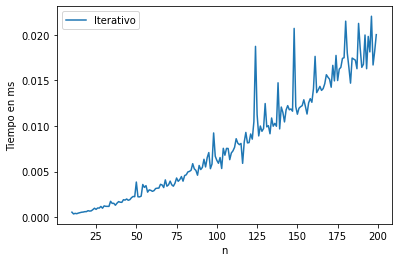

In [36]:
def topologicalSort(T):
  state = dict()
  for n in T: state[n] = "no descubierto"

  L = [] #Lista auxiliar
  for n in T:
    S=[n]
    while len(S)>0:
      n=S.pop()
      if state[n] == "no descubierto":
        state[n] = "descubierto"
        S.append(n)
        for adj in reversed(list(T[n])):
          if state[adj] == "no descubierto": S.append(adj)
      elif state[n] == "descubierto":
        state[n] = "visitado"
        L.append(n)
  L = list(reversed(L))
  return L
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  H = G.copy()

  t1 = repeat(setup="from __main__ import topologicalSort", stmt=lambda: topologicalSort(G), repeat=1, number=10)
  

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)

plt.legend(["Iterativo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Resultado:** Como podemos ver, el tiempo de ejecución mencionado anteriormente concuerda con la demostración gráfica, a medida que aumenta la cantidad de nodos del grafo va aumentando el tiempo.